In [1]:
# necesary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [7]:
# Loading the dataset
mpl.rcParams['font.size'] = 14.0

sw = pd.read_parquet('D:\Purvi\Book-character-visualizations\StarWars\Dataset\StarWars_Characters.parquet')

In [8]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         5334 non-null   object 
 1   key          5334 non-null   object 
 2   url          5334 non-null   object 
 3   description  5334 non-null   object 
 4   species_2nd  12 non-null     object 
 5   species_3rd  5 non-null      object 
 6   species      5334 non-null   object 
 7   home_world   1591 non-null   object 
 8   gender       5334 non-null   object 
 9   height       637 non-null    float64
 10  eye_color    2368 non-null   object 
 11  skin_color   2949 non-null   object 
 12  hair_color   1968 non-null   object 
 13  weight       77 non-null     object 
dtypes: float64(1), object(13)
memory usage: 583.5+ KB


In [11]:
sw.head()

,name,key,url,description,species_2nd,species_3rd,species,home_world,gender,height,eye_color,skin_color,hair_color,weight
0,1138 (First Order),1138_(First_Order),https://starwars.fandom.com/wiki/1138_(First_O...,1138 was a human male stormtrooper who served ...,None,None,Human,None,Male,NaN,None,None,None,None
1,1151,1151,https://starwars.fandom.com/wiki/1151,1151 was a clone cadet who was a part of the C...,None,None,Human,Kamino,Male,NaN,Brown,Tan,Black,None
2,1174,1174,https://starwars.fandom.com/wiki/1174,"1174, nicknamed ""Whiplash,"" was a clone troope...",None,None,Human,Kamino,Male,NaN,Brown,Tan,Black,None
3,224 (Coruscant Security Force),224_(Coruscant_Security_Force),https://starwars.fandom.com/wiki/224_(Coruscan...,224 was the designation of a human male office...,None,None,Human,None,Male,NaN,None,Light,None,None
4,3-6,3-6,https://starwars.fandom.com/wiki/3-6,3-6 was a male death trooper in DT-F16's squad...,None,None,Human,None,Male,NaN,None,None,None,None


## Data Exploration

Before deep-diving into the world of star wars, it's important to analyse the dataset that we have.  
One interesting question that comes to mind, looking at the dataset is the distribution of species throught the series.  
Let's check it out!

## Species

##### How many species exist in the star wars universe?

In [12]:
len(sw.species.unique())

530

530 is huge! Almost too huge to create a good visuslization. Therefore, we'll select only those species that have more than 40 occurences in the dataset. All others are grouped as others.

In [13]:
n_mentions = 40

d = sw.copy()
species = d.species.value_counts()
other = species[species < n_mentions].index.tolist()
d.loc[d.species.isin(other), 'species'] = 'Other'

species =  d.species.value_counts()

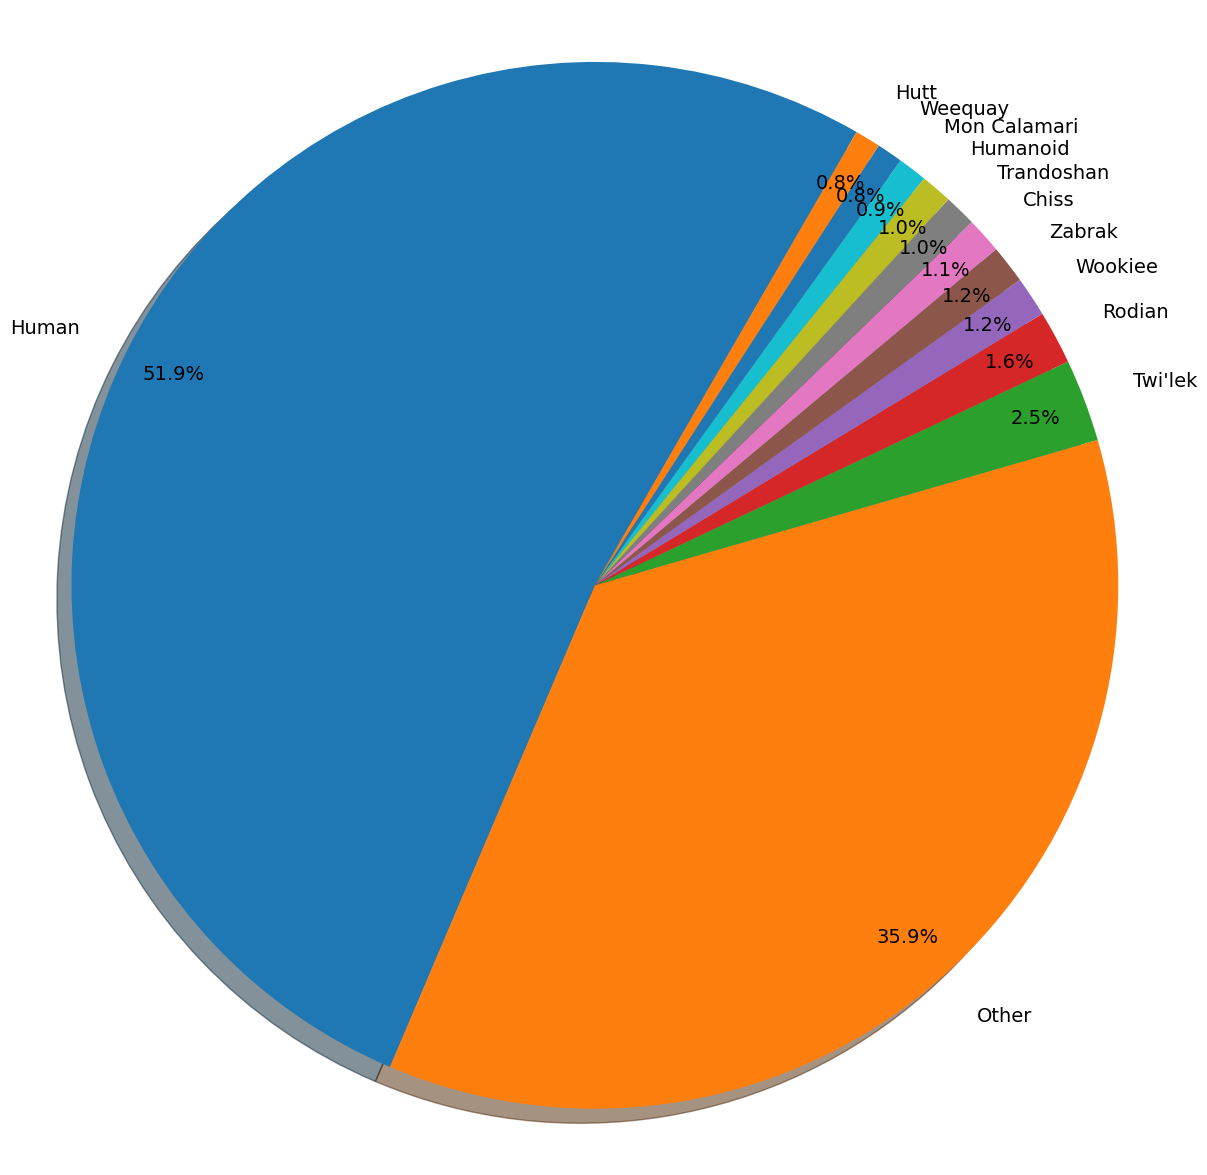

In [17]:
fig, ax = plt.subplots(figsize=[15,15])

labels = species.index
_ = plt.pie(
    x=species, 
    autopct="%.1f%%", 
    labels=species.index.tolist(),
    pctdistance=0.9,
    shadow=True,
    startangle=60,    
)
_ = plt.axis('equal')

In [18]:
species

Human           2770
Other           1914
Twi'lek          136
Rodian            88
Wookiee           66
Zabrak            63
Chiss             59
Trandoshan        53
Humanoid          52
Mon Calamari      48
Weequay           43
Hutt              42
Name: species, dtype: int64

## Home Planet

As we saw earlier, the number of species in star wars is diverse, therefore it might be interesting to look into the home planets of each character. 

In [19]:
sw.home_world.value_counts()

Kamino       217
Naboo         71
Corellia      48
Alderaan      47
Ryloth        45
            ... 
Fresia         1
Veros          1
Toola          1
Cona           1
Sleheyron      1
Name: home_world, Length: 463, dtype: int64

There are 463 unique planets introduced throughout the starwars series. It's too big a number to visualise in its entirety, therefore we'll put a threshold of a minimum 8 occurences in the dataset.

In [20]:
n = 8

d = sw.copy()
hw = d.home_world.value_counts()
other = hw[hw < n].index.tolist()
hw = hw[hw >= n]
d.loc[d.home_world.isin(other), 'home_world'] = 'Other'

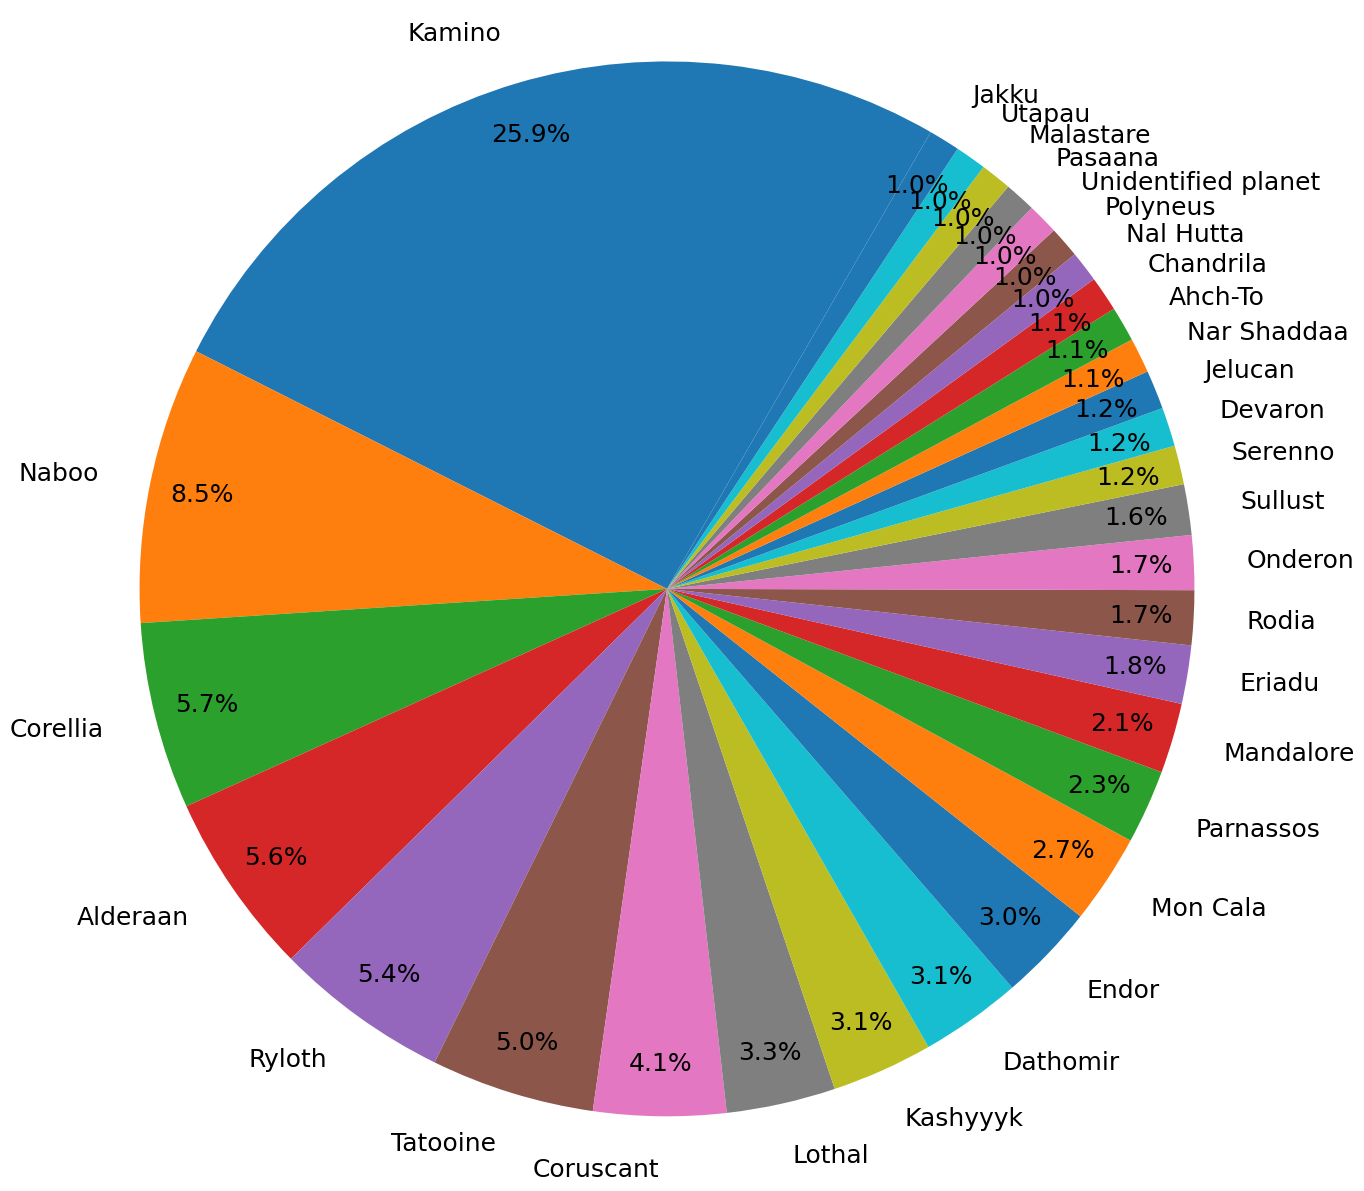

In [21]:
pie, ax = plt.subplots(figsize=[15,15])
plt.rcParams['font.size'] = 18
_ = plt.pie(
    x=hw, 
    autopct="%.1f%%", 
#     explode=[0, 0.1] + [0] * (len(species) - 2), 
    labels=hw.index.tolist(),
    pctdistance=0.9,
#     shadow=True,
    startangle=60,
)
_ = plt.axis('equal')

Interestingly, Kamino, which might be less known to those who have only seen the movies, is at the top. Kamino was famous for it's cloning technology and the reason why it's so popular is because of the animated series of Star Wars called Clone Wars. The second most famous is Naboo - A favourite of all indeed - it was ruled by Queen Amidala.

## Gender

Another rather interesting thing to observe would be the distribution of gender throughout the series. Because Star Wars is a late seventies creation, it is natural to expect a dominance of male characters. 

In [22]:
sw.gender.unique()

array(['Male', 'None', 'Female', 'Non-binary'], dtype=object)

Interestingly, even for a series that was made in the seveties, star wars has the presence of non-binary characters as well, putting it ahead of it's time in that aspect!

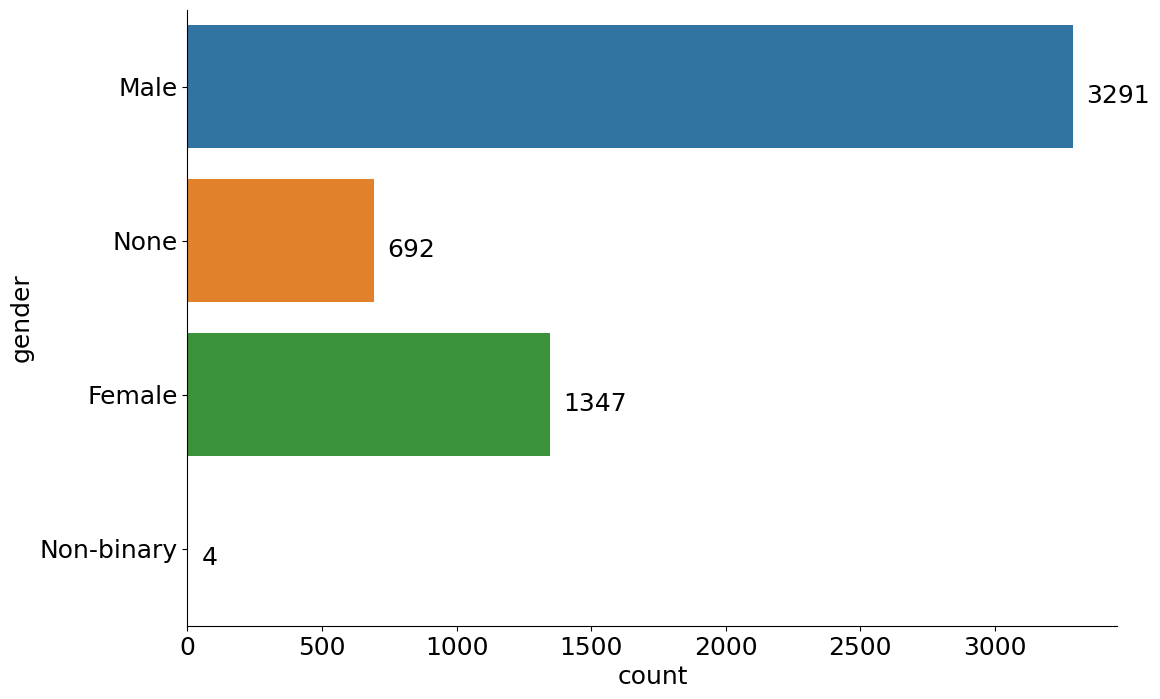

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(data=sw, y='gender', ax=ax)
sns.despine()
for p in ax.patches:
    ax.annotate(
        f'\n{p.get_width()}', 
        (p.get_width() + 50, p.get_y()+0.2),
        ha='left', 
        va='top', color='black', size=18)

# Word Cloud

Being a die hard of star wars, an analysis on the series would be incomplete without a word cloud. To give it an even more interesting outlook, we are going to use the WordCloud Python Package by Andreas Muller, simply because it gives us an edge to create it in the form of a storm trooper!

In [42]:
from PIL import Image
import random
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
fd = pd.read_parquet('D:\Purvi\Book-character-visualizations\StarWars\Dataset\StarWars_Descriptions.parquet')

In [27]:
def random_gray_color(
    word,
    font_size, 
    position, 
    orientation, 
    random_state=None,               
    **kwargs,
):
    """
    Return random gray color
    """
    return f"hsl(0, 0%, {random.randint(60, 100)}%)"

In [40]:
mask = 255 - np.array(Image.open('D:\Purvi\Book-character-visualizations\StarWars\Assets\stormtrooper.png'))

In [37]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [44]:
wordcloud = WordCloud(
    random_state=42,
    collocations=False,
    stopwords=STOPWORDS,
    max_words=1000,
    mask=mask,
).generate('\n'.join(fd.description.tolist()))

ValueError: Only supported for TrueType fonts